# Ejercicio practico vicuslizaciones

In [1]:
import pandas as pd
data=pd.read_csv('HRDataset_v14.csv',sep=',')
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [2]:
data.shape

(311, 36)

In [6]:
data['TermReason']

0      N/A-StillEmployed
1          career change
2                  hours
3      N/A-StillEmployed
4       return to school
             ...        
306    N/A-StillEmployed
307     Another position
308    N/A-StillEmployed
309    N/A-StillEmployed
310    N/A-StillEmployed
Name: TermReason, Length: 311, dtype: object

In [3]:
data.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

**Univariado**
1. Analizar salarios X
2. Estado civil, genero, Esta empleado (Si o No) X
3. Porcentaje de Hispanos X
4. Posicion laboral X
5. DateofHire fluctuaciones de contratacion X
6. Porque la gente se retira de sus trabajos (Pendiente)
 
**Bivariado**

**Categoria vs numero**
1. Salario vs genero X
2. Salario vs Position X
3. Salario vs Performance (Pendiente)
4. Salario vs Hispanic rate (Pendiente)

**Categoria vs categoria**
1. Genero vs Posicion 
2. Estado civil vs genero 
3. State vs Genero

In [7]:
# Verificamos si hay nulos primero
data.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

Text(0.5, 1.0, 'Histograma de Salario')

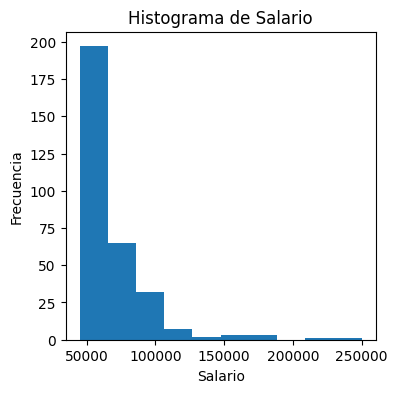

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4,4))
ax.hist(x= data.Salary, density=False, orientation='vertical')
ax.set_xlabel('Salario')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de Salario')

Text(0.5, 1.0, 'Distribucion del genero')

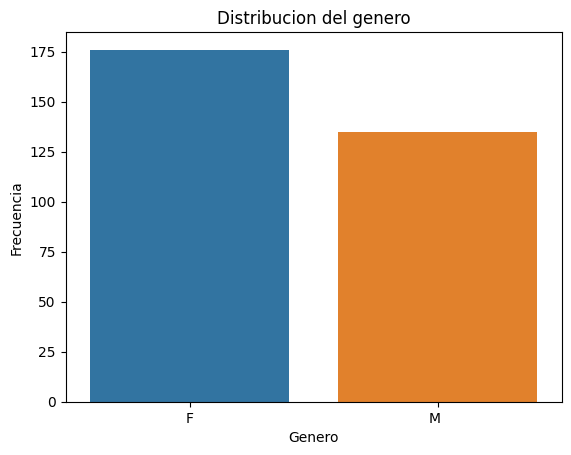

In [21]:
import seaborn as sns 
serie=data['Sex'].value_counts()
sns.barplot(x= serie.index, y= serie.values)
plt.xlabel('Genero')
plt.ylabel('Frecuencia')
plt.title('Distribucion del genero')

(array([197.,  65.,  32.,   7.,   2.,   3.,   3.,   0.,   1.,   1.]),
 array([ 45046. ,  65541.4,  86036.8, 106532.2, 127027.6, 147523. ,
        168018.4, 188513.8, 209009.2, 229504.6, 250000. ]),
 <BarContainer object of 10 artists>)

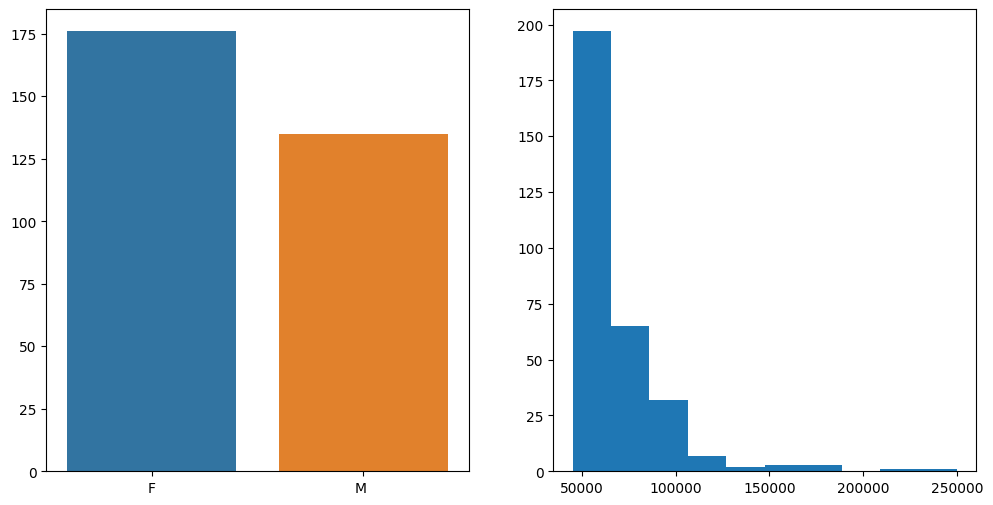

In [24]:
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.barplot(x= serie.index, y= serie.values, ax=ax[0])
ax[1].hist(x= data.Salary, density=False, orientation='vertical')

Text(0.5, 1.0, 'Conteo de actividad laboral')

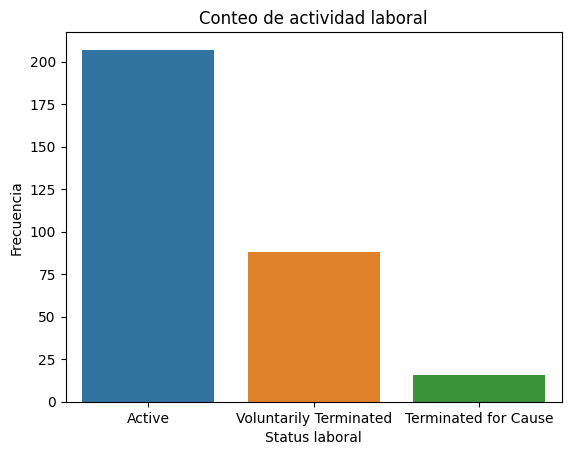

In [30]:
serie_f=data['EmploymentStatus'].value_counts()
sns.barplot(x= serie_f.index, y= serie_f.values)
plt.xlabel('Status laboral')
plt.ylabel('Frecuencia')
plt.title('Conteo de actividad laboral')

In [55]:
(data['HispanicLatino'].str.lower().value_counts()/data.shape[0])*100

no     90.996785
yes     9.003215
Name: HispanicLatino, dtype: float64

<Axes: title={'center': 'Porcentaje de Latinos'}, xlabel='Es Latino', ylabel='Porcentaje (%)'>

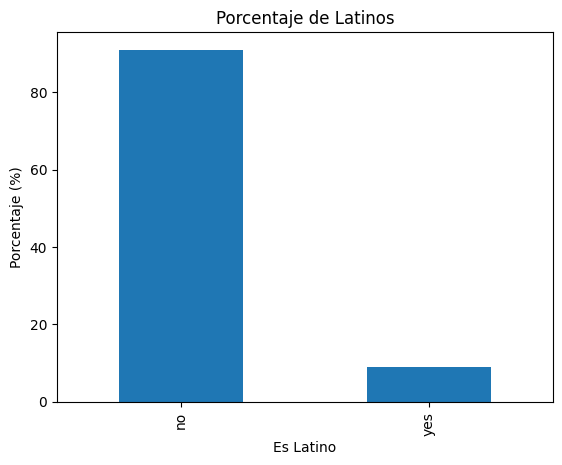

In [50]:
#data['HispanicLatino'].str.lower().value_counts().plot(kind='bar')
serie_t=(data['HispanicLatino'].str.lower().value_counts()/data.shape[0])*100
serie_t.plot(kind='bar', xlabel='Es Latino',ylabel='Porcentaje (%)',title='Porcentaje de Latinos')

In [63]:
data['Position'].value_counts()[0:10]

Production Technician I     137
Production Technician II     57
Area Sales Manager           27
Production Manager           14
Software Engineer            10
IT Support                    8
Data Analyst                  7
Sr. Network Engineer          5
Database Administrator        5
Network Engineer              5
Name: Position, dtype: int64

<Axes: >

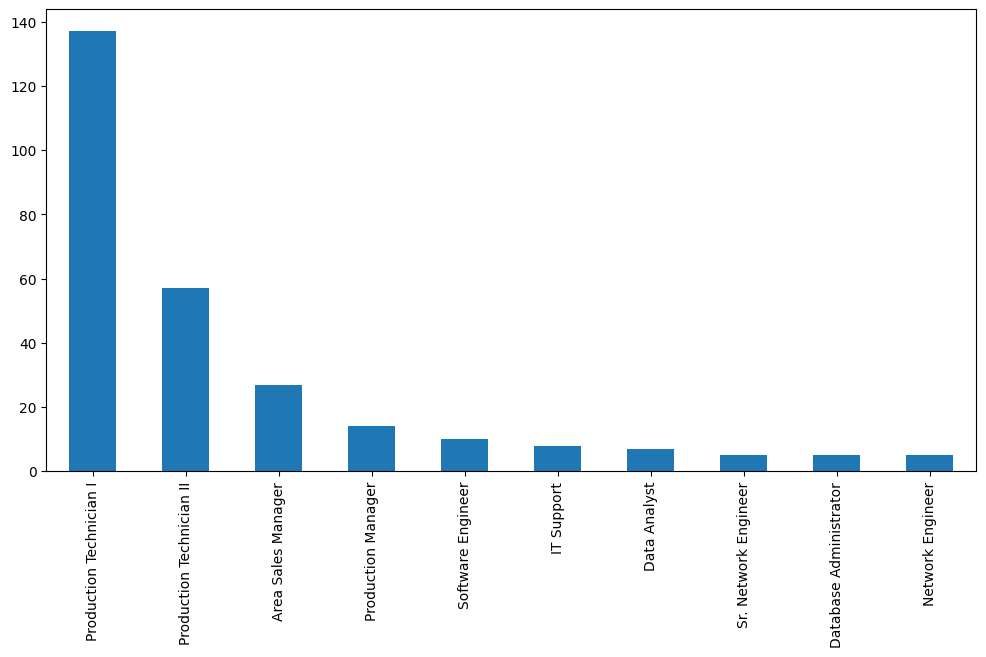

In [70]:
data['Position'].value_counts()[0:10].plot(kind='bar',figsize=(12,6))

In [86]:
data['DateofHire']

0       7/5/2011
1      3/30/2015
2       7/5/2011
3       1/7/2008
4      7/11/2011
         ...    
306     7/7/2014
307     9/2/2008
308    4/10/2010
309    3/30/2015
310    9/29/2014
Name: DateofHire, Length: 311, dtype: object

In [85]:
# Forma equivalente de sacar el año sin que convertir a datetime
data['DateofHire'].apply(lambda x: x[-4:])

0      2011
1      2015
2      2011
3      2008
4      2011
       ... 
306    2014
307    2008
308    2010
309    2015
310    2014
Name: DateofHire, Length: 311, dtype: object

<Axes: title={'center': 'Evolucion temporal de contrataciones'}, xlabel='Año', ylabel='Cantidad contrataciones'>

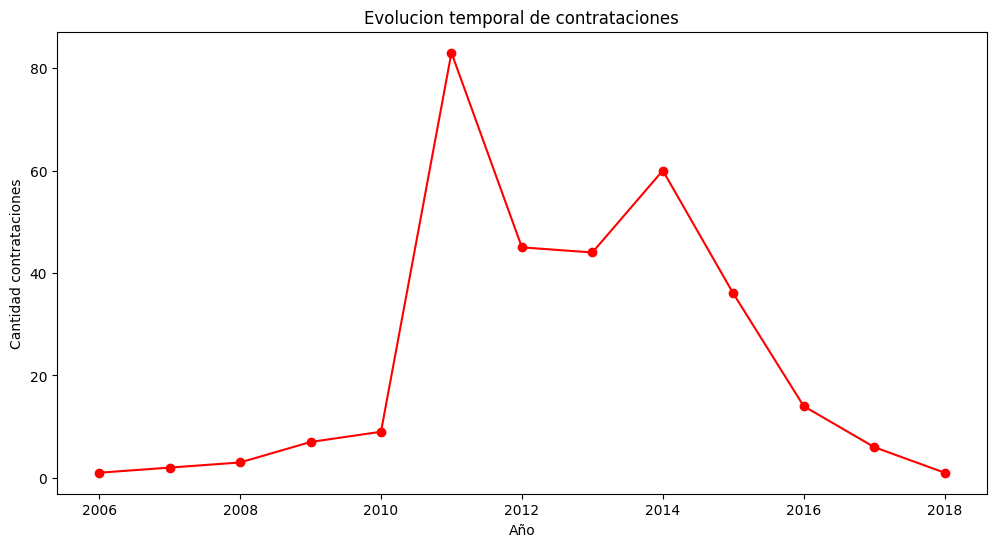

In [82]:
data['Fecha_modificada']=pd.to_datetime(data['DateofHire'])
data['Year']=data['Fecha_modificada'].dt.year 
data.groupby(by='Year').count()['Employee_Name'].plot(kind='line',marker='o',\
                                                      color='red',xlabel='Año',\
                                                      ylabel='Cantidad contrataciones',\
                                                      title='Evolucion temporal de contrataciones',\
                                                      figsize=(12,6))

Text(0.5, 1.0, 'Salario vs Posicion')

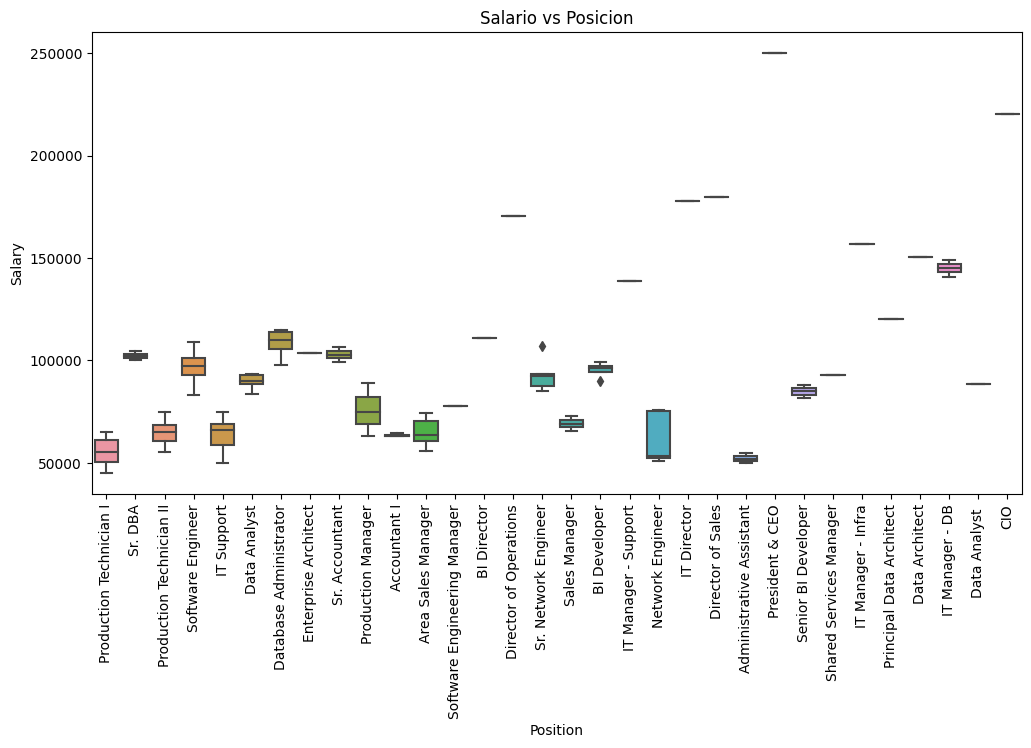

In [93]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data, x='Position',y='Salary')
plt.xticks(rotation=90)
plt.title('Salario vs Posicion')

Text(0.5, 1.0, 'Salario vs Posicion')

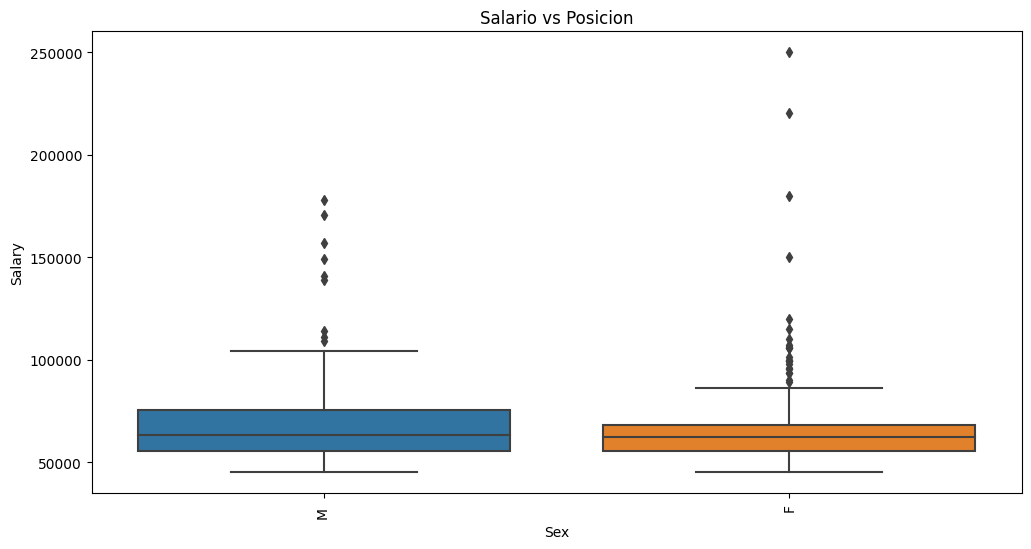

In [94]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data, x='Sex',y='Salary')
plt.xticks(rotation=90)
plt.title('Salario vs Posicion')

In [97]:
data[['Sex','EmpID']].groupby(by='Sex').describe()

EmpID                                                                 \
     count          mean        std      min       25%      50%       75%   
Sex                                                                         
F    176.0  10153.176136  87.148790  10002.0  10081.75  10152.0  10227.75   
M    135.0  10159.681481  93.613898  10001.0  10071.00  10167.0  10238.50   

              
         max  
Sex           
F    10304.0  
M    10311.0

In [103]:
pd.crosstab(data.Position,data.Sex)

Sex,F,M
Position,,
Accountant I,1,2
Administrative Assistant,3,0
Area Sales Manager,12,15
BI Developer,1,3
BI Director,0,1
CIO,1,0
Data Analyst,3,4
Data Analyst,0,1
Data Architect,1,0


<Axes: xlabel='Position'>

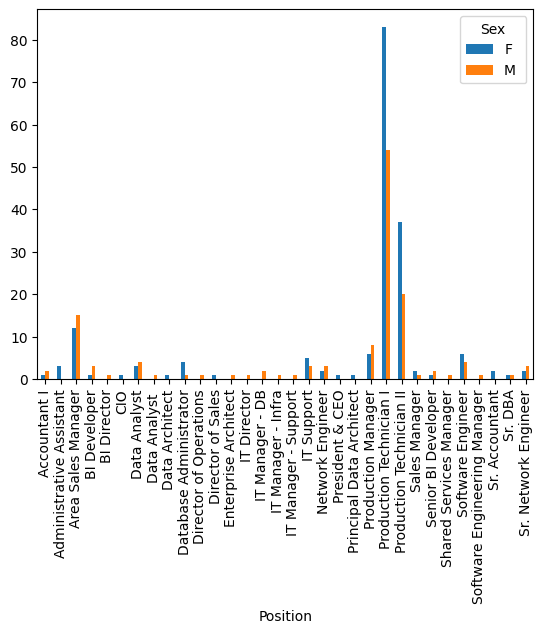

In [102]:
pd.crosstab(data.Position,data.Sex).plot(kind='bar')